In [1]:
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup, Comment
import pandas as pd

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.binary_location = "chromedriver_win32\chromedriver.exe"

In [3]:
driver = webdriver.Chrome()
link = "https://play.google.com/store/apps/details?id=nic.goi.aarogyasetu&showAllReviews=true"
driver.get(link)
driver.maximize_window()
sleep(2)

In [4]:
for i in range(30):
    
    showMore = driver.find_elements_by_xpath("//span[text()='Show More']")

    if(showMore):
        showMore[0].click()

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    
    sleep(0.5)

In [5]:
for _ in range(4):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    
    sleep(0.5)

In [6]:
driver.execute_script("window.scrollTo(0, 0)")

In [7]:
buttons = driver.find_elements_by_xpath("//*[contains(text(), 'Full Review')]")

for b in buttons:
    b.click()

In [8]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

In [9]:
appName = soup.h1.span.text
print(appName)

Aarogya Setu


In [10]:
userNameBlocks = soup.find_all('div', class_='xKpxId zc7KVe')

In [11]:
print("Number of reviews = ",len(userNameBlocks))

Number of reviews =  640


In [12]:
names=[]
star_texts=[]
star_numbers=[]
review_dates=[]
helpful_counts=[]
review_texts=[]

In [13]:
for user in userNameBlocks:
    poster_name=user.find('span',class_='X43Kjb').text
    names.append(poster_name)

    rating=user.find('div',class_='pf5lIe').findAll('div')
    rating_text=rating[0]
    rating_text=rating_text.get_attribute_list("aria-label")[0]
    rating_number=rating_text[6]
    star_texts.append(rating_text)
    star_numbers.append(rating_number)
    rating_date=user.find('span',class_ = "p2TkOb").text    
    review_dates.append(rating_date)
    helpful_count=user.find("div",class_="jUL89d y92BAb").text
    helpful_counts.append(helpful_count)


In [14]:
reviews=soup.select('div.UD7Dzf > span')

count=0

while count<len(reviews):
    short_review=reviews[count].get_text(strip=True)
    count+=1
    if count==len(reviews):
        break
    long_review=reviews[count].get_text(strip=True)
    if len(short_review)!=0:
        review=short_review
    if len(long_review)!=0:
        review=long_review
    count+=1
    review_texts.append(review)

In [15]:
min_length=min(len(names),len(review_dates),len(star_texts),len(star_numbers),len(helpful_counts),len(review_texts))
print("The minimum length is ",min_length)

The minimum length is  640


In [16]:
d={}
d["reviewer_name"]=names[0:min_length-1]
d["review_date"]=review_dates[0:min_length-1]
d["review_star_text"]=star_texts[0:min_length-1]
d["review_star_count"]=star_numbers[0:min_length-1]
d["review_helpful_count"]=helpful_counts[0:min_length-1]
d["review"]=review_texts[0:min_length-1]

In [17]:
for key, value in d.items():
        print(len(value))

639
639
639
639
639
639


In [18]:
df = pd.DataFrame(data=d)
print(df.shape)

(639, 6)


In [19]:
df.head()

reviewer_name        review_date                 review_star_text  \
0              arun kumar  November 22, 2020  Rated 1 stars out of five stars   
1                     K s  December 16, 2020  Rated 3 stars out of five stars   
2          hoshaiah reddy   December 7, 2020  Rated 1 stars out of five stars   
3  Nallasivan Govindasamy  November 23, 2020  Rated 1 stars out of five stars   
4          Aayush Agrawal  December 11, 2020  Rated 3 stars out of five stars   

  review_star_count review_helpful_count  \
0                 1                 1024   
1                 3                   11   
2                 1                  183   
3                 1                  333   
4                 3                   65   

                                              review  
0  Useless app, don't give real time update when ...  
1  Please remove the scrolling text in your covid...  
2  It was fine in the beginning. Now it automatic...  
3  ZERO RATING. I never get any alerts from this ...  
4  Deceased and recovered graphs are not visible ...

In [20]:
df.describe()

reviewer_name        review_date                 review_star_text  \
count               639                639                              639   
unique              638                155                                5   
top     Tanishq Agarwal  November 25, 2020  Rated 1 stars out of five stars   
freq                  2                 20                              303   

       review_star_count review_helpful_count  \
count                639                  639   
unique                 5                  191   
top                    1                    0   
freq                 303                  207   

                                                   review  
count                                                 639  
unique                                                637  
top     Totally useless app. If it has real time data ...  
freq                                                    2

In [21]:
df.to_csv("data/ArogyaSetuReviews.csv", index=False)

************

In [2]:
import pandas as pd
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data/ArogyaSetuReviews.csv', index_col=False)

In [3]:
df.head()

reviewer_name        review_date                 review_star_text  \
0              arun kumar  November 22, 2020  Rated 1 stars out of five stars   
1                     K s  December 16, 2020  Rated 3 stars out of five stars   
2          hoshaiah reddy   December 7, 2020  Rated 1 stars out of five stars   
3  Nallasivan Govindasamy  November 23, 2020  Rated 1 stars out of five stars   
4          Aayush Agrawal  December 11, 2020  Rated 3 stars out of five stars   

   review_star_count  review_helpful_count  \
0                  1                  1025   
1                  3                    11   
2                  1                   183   
3                  1                   333   
4                  3                    65   

                                              review  
0  Useless app, don't give real time update when ...  
1  Please remove the scrolling text in your covid...  
2  It was fine in the beginning. Now it automatic...  
3  ZERO RATING. I never get any alerts from this ...  
4  Deceased and recovered graphs are not visible ...

In [8]:
df.describe()

review_star_count  review_helpful_count
count         679.000000            679.000000
mean            2.297496            108.070692
std             1.469406            352.690812
min             1.000000              0.000000
25%             1.000000              0.000000
50%             2.000000              3.000000
75%             3.000000             43.000000
max             5.000000           5130.000000

In [5]:
df.sort_values(by="review_star_count",ascending=False).head()

reviewer_name         review_date                 review_star_text  \
323         Siddiq ali    October 14, 2020  Rated 5 stars out of five stars   
176  Santosh kumar Das    December 1, 2020  Rated 5 stars out of five stars   
91       Jasveer World  September 30, 2020  Rated 5 stars out of five stars   
495     Mohan Jambhale   November 19, 2020  Rated 5 stars out of five stars   
494        Hemant Jain       July 14, 2020  Rated 5 stars out of five stars   

     review_star_count  review_helpful_count  \
323                  5                    41   
176                  5                     1   
91                   5                     7   
495                  5                     8   
494                  5                    12   

                                                review  
323  It is in initial stage options shown in ad dif...  
176  This app not bad but it's not useful in this c...  
91   Hey! Aarogya setu team I have ab idea for a fe...  
495  Great application. Thank you devlpors for this...  
494  Work by the government in managing the all is ...

In [6]:
df.sort_values(by="review_star_count",ascending=True).head()

reviewer_name        review_date                 review_star_text  \
0           arun kumar  November 22, 2020  Rated 1 stars out of five stars   
468  Kale Bala Nirmala      July 18, 2020  Rated 1 stars out of five stars   
241         uday barua  November 22, 2020  Rated 1 stars out of five stars   
469       Ankit Narula  December 10, 2020  Rated 1 stars out of five stars   
239           Steve M.     August 7, 2020  Rated 1 stars out of five stars   

     review_star_count  review_helpful_count  \
0                    1                  1025   
468                  1                     1   
241                  1                     1   
469                  1                     0   
239                  1                   599   

                                                review  
0    Useless app, don't give real time update when ...  
468  This is app is only useful for knowing number ...  
241  Not functioning maximum time. Showing 403 forb...  
469  When I get positive report it get red immediat...  
239  Stopped working!! I have to use this app to go...

In [20]:
stopwords = set(STOPWORDS)

In [17]:
wordcloud = WordCloud().generate(text)

In [24]:
negative = " ".join(review for review in df[df["review_star_count"]==1].review)
positive = " ".join(review for review in df[df["review_star_count"]==5].review)

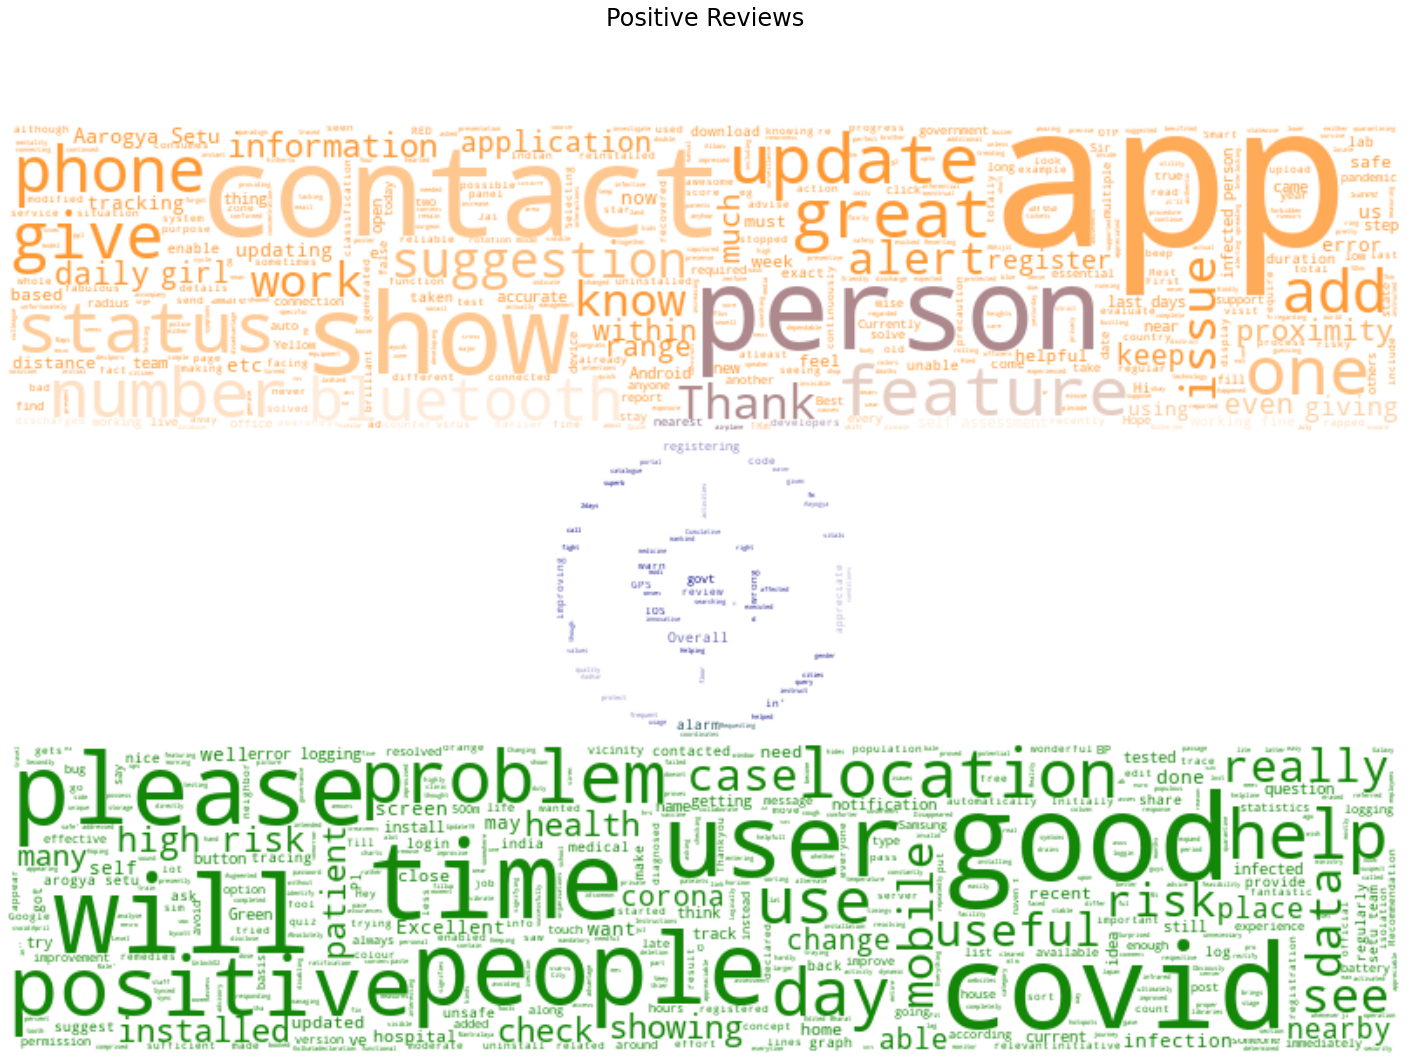

In [55]:
mask = np.array(Image.open("flag.jpg"))
wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(positive)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[25,18])
plt.title("Positive Reviews", fontsize=24, y=1.1)
plt.imshow(wordcloud_pos.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig('pos.jpg')

plt.show()

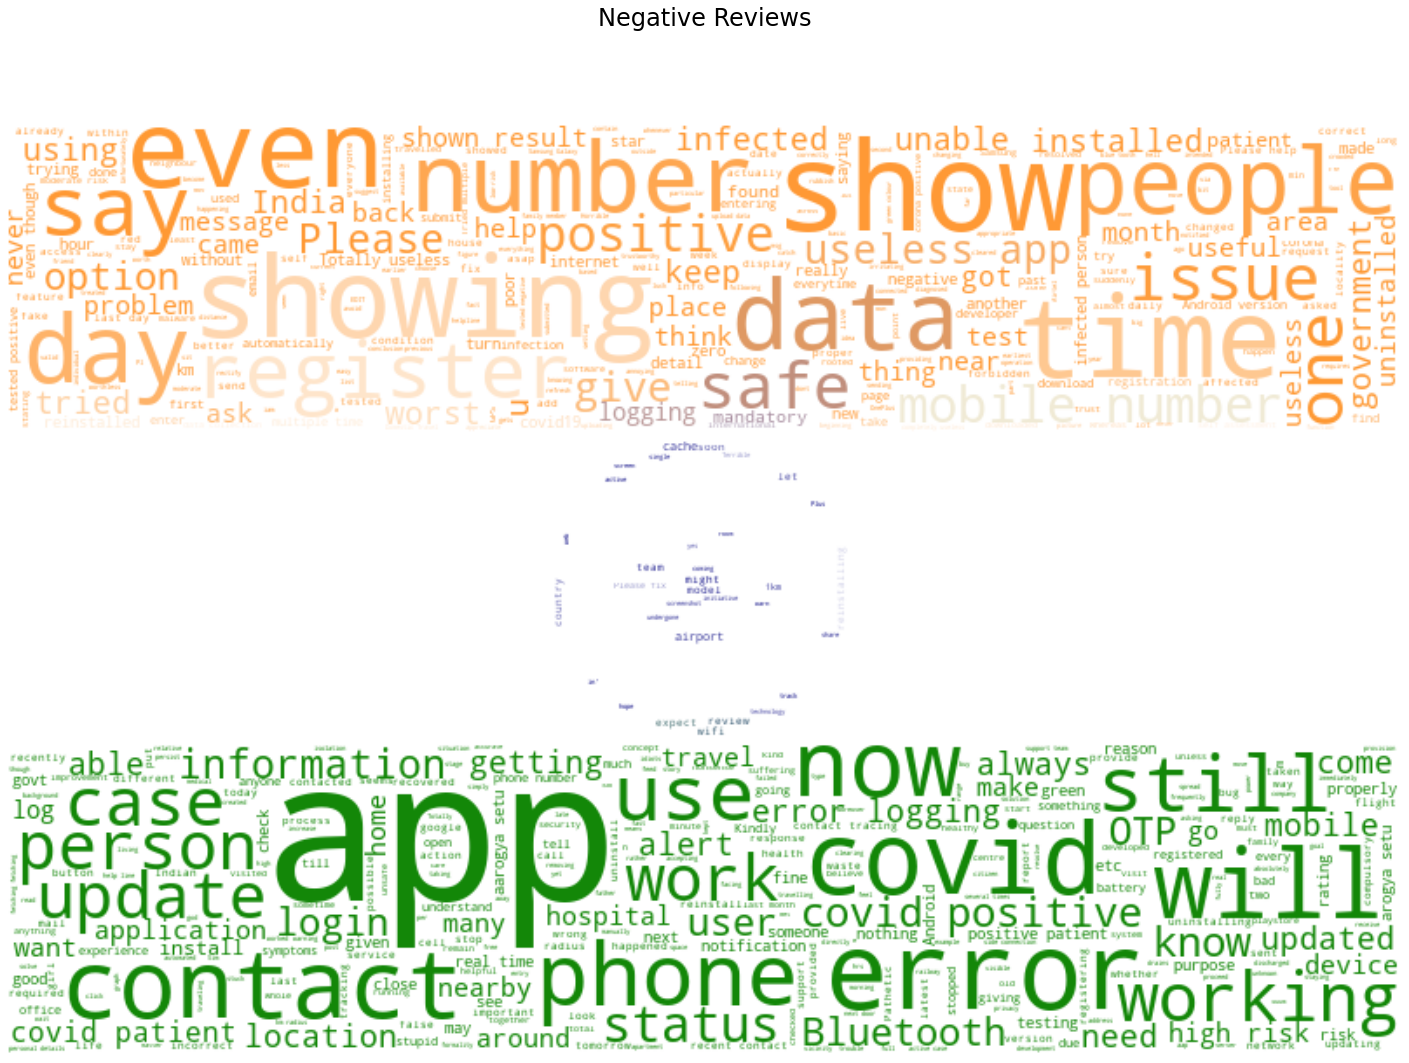

In [57]:
mask = np.array(Image.open("flag.jpg"))
wordcloud_neg = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(negative)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[25,18])
plt.title("Positive Reviews", fontsize=24, y=1.1)
plt.title("Negative Reviews", fontsize=24, y=1.1)
plt.imshow(wordcloud_neg.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig('neg.jpg')

plt.show()